In [2]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import classification_report #正确率，召回率等做评估用
from sklearn import preprocessing #标准化
from sklearn import linear_model
#是否标准化
scale = False

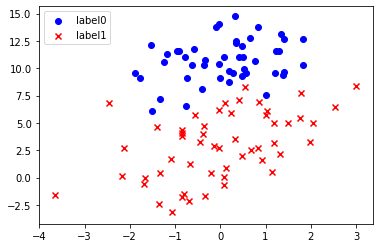

In [3]:
data = np.genfromtxt('LR-testSet.csv',delimiter = ',')
x_data = data[:,:2]
y_data = data[:,2]

def plot():
    x0 = []
    x1 = []
    y0 = []
    y1 = []
    #切分不同类别的数据
    for i in range(len(x_data)):
        if y_data[i] == 0:
            x0.append(x_data[i,0])
            y0.append(x_data[i,1])
        else:
            x1.append(x_data[i,0])
            y1.append(x_data[i,1])
    scatter0 = plt.scatter(x0,y0,c='b',marker = 'o')
    scatter1 = plt.scatter(x1,y1,c='r',marker = 'x')
    #画图例
    plt.legend(handles=[scatter0,scatter1],labels=['label0','label1'],loc='best')
    
    
plot()
plt.show()

In [4]:
logistic = linear_model.LogisticRegression()
logistic.fit(x_data,y_data)

/home/miao/.local/lib/python3.6/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

[[3.52707496]
 [8.92547171]]


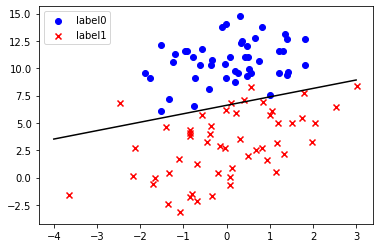

In [9]:
if scale == False:
    plot()
    x_test = np.array([[-4],[3]])
    y_test = (-logistic.intercept_ - x_test*logistic.coef_[0][0]) / logistic.coef_[0][1]
    print(y_test)
    plt.plot(x_test,y_test,'k')
    plt.show()

In [10]:
predictions = logistic.predict(x_data)
print(classification_report(y_data,predictions))

              precision    recall  f1-score   support

         0.0       0.92      1.00      0.96        47
         1.0       1.00      0.92      0.96        53

    accuracy                           0.96       100
   macro avg       0.96      0.96      0.96       100
weighted avg       0.96      0.96      0.96       100

